# üå≥ An√°lisis de Deforestaci√≥n con Machine Learning

Este notebook aborda la problem√°tica de la **deforestaci√≥n** mediante el uso de algoritmos de **clustering y aprendizaje autom√°tico**.  
El objetivo es identificar patrones y segmentaciones que permitan comprender mejor los factores que influyen en la p√©rdida de bosques.

---

## üéØ Objetivos
- Analizar datos relacionados con la deforestaci√≥n.  
- Aplicar t√©cnicas de **preprocesamiento y normalizaci√≥n**.  
- Utilizar algoritmos de **clustering** para agrupar √°reas seg√∫n sus caracter√≠sticas.  
- Visualizar los resultados y extraer conclusiones interpretables.  

---

## üöÄ Metodolog√≠a
1. **Carga y exploraci√≥n de datos** ‚Üí revisi√≥n de las variables disponibles.  
2. **Preprocesamiento** ‚Üí limpieza, normalizaci√≥n (ej. MinMaxScaler) y transformaci√≥n de los datos.  
3. **Modelado** ‚Üí aplicaci√≥n de algoritmos de clustering como **K-Means, DBSCAN o Jer√°rquico**.  
4. **Evaluaci√≥n** ‚Üí comparaci√≥n de m√©tricas (Silhouette, Calinski-Harabasz, Davies-Bouldin).  
5. **Visualizaci√≥n** ‚Üí gr√°ficos en 2D/3D para interpretar los resultados.  

---

## üìä Resultados esperados
- Identificaci√≥n de **zonas cr√≠ticas** de deforestaci√≥n.  
- Segmentaci√≥n de √°reas con patrones similares de impacto ambiental.  
- Insights que sirvan como base para **estrategias de conservaci√≥n** y toma de decisiones.  

---

## ‚úÖ Conclusi√≥n
Este an√°lisis muestra c√≥mo el **clustering** puede ser una herramienta valiosa para comprender fen√≥menos ambientales complejos,  
ofreciendo una visi√≥n clara de las din√°micas de deforestaci√≥n y ayudando a dise√±ar pol√≠ticas m√°s efectivas de protecci√≥n forestal.


In [1]:
!pip freeze     #para saber cu√°les librer√≠as est√°n preinstaladas en Colab

aext-assistant @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_c3ggzgbxl5/croot/aext-assistant_1746560150370/work
aext-assistant-server @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7fizob4pzy/croot/aext-assistant-server_1746552988949/work
aext-core @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_d1xazndquk/croot/aext-core_1746546092962/work
aext-core-server @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_aev4ofboaa/croot/aext-core-server_1746542351523/work
aext-panels @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_ad18lo8pif/croot/aext-panels_1746560096298/work
aext-panels-server @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_87cpzf1a0s/croot/aext-panels-server_1746552964751/work
aext-project-filebrowser-server @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_0ayzciefrt/croot/aext-project-filebrowser-server_1746562212396/work/back

In [2]:
# https://es.wikipedia.org/wiki/%C3%8Dndice_de_vegetaci%C3%B3n_de_diferencia_normalizada
# https://es.wikipedia.org/wiki/Landsat
# https://scikit-learn.org/stable/modules/clustering.html#clustering


# CARGAMOS LAS LIBRER√çAS QUE USAREMOS
import numpy as np
import pandas as pd
from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib import colors

from sklearn.cluster import KMeans
# para que muestre los gr√°ficos
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

# üå± Funci√≥n para calcular NDVI

La siguiente funci√≥n calcula el **√çndice de Vegetaci√≥n de Diferencia Normalizada (NDVI)** a partir de las bandas **roja** e **infrarroja** de una imagen satelital.

---

## üìò Definici√≥n de NDVI
El NDVI se calcula con la f√≥rmula:

\[
NDVI = \frac{(NIR - RED)}{(NIR + RED)}
\]

- **NIR** ‚Üí banda de infrarrojo cercano.  
- **RED** ‚Üí banda roja.  
- Valores t√≠picos:
  - Cercanos a **1** ‚Üí vegetaci√≥n sana y densa.  
  - Cercanos a **0** ‚Üí √°reas sin vegetaci√≥n.  
  - Negativos ‚Üí agua, nieve o nubes.  

In [ ]:
def ndvi(file_red, file_nir):
    '''
    Calcula el √≠ndice NDVI para las im√°genes guardadas en la carpeta usando la
    banda roja y la infrarroja, seg√∫n la definici√≥n.
    Devuelve el np.array resultante
    Par√°metros: carpeta, nro de banda Rojo y nro de banda IR, a√±o si corresponde
    '''
    # defino el array ndvi, pero si b_red + b_ir = 0. -> ndvi = -999.
    ndvi = np.where((file_nir + file_red) == 0., -999., (file_nir - file_red) /
                    (file_nir + file_red))

    return ndvi     # 'ndvi' es un array de numpy


In [ ]:
# Definimos las bandas espectrales a cargar

# Download the .npy files from the raw URLs
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy'


banda_red_1986 = np.load('LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy')
banda_nir_1986 = np.load('LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy')
banda_red_2017 = np.load('LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy')
banda_nir_2017 = np.load('LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy')
n_clusters = 3


--2025-08-07 23:07:46--  https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/palasatenea66/DATASETS/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy [following]
--2025-08-07 23:07:47--  https://raw.githubusercontent.com/palasatenea66/DATASETS/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7385468 (7.0M) [application/octet-stream]
Saving to: ‚ÄòLT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy‚Äô

LT05_L1TP_230077_19 100%[==

In [ ]:
!ls

LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy
LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy
LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy
sample_data


In [ ]:
banda_red_1986

array([[ 4389,  4426,  4315, ...,  2134,  2171,  2171],
       [ 4426,  4537,  4426, ...,  2134,  2134,  2171],
       [ 3866,  3828,  3716, ...,  2171,  2171,  2134],
       ...,
       [-9999, -9999, -9999, ...,  2281,  2356,  2281],
       [-9999, -9999, -9999, ...,  2356,  2356,  2356],
       [-9999, -9999, -9999, ...,  2356,  2356,  2281]], dtype=int16)

In [ ]:
banda_red_1986.shape

(1483, 2490)

In [ ]:
banda_red_2017.shape

(1492, 2504)

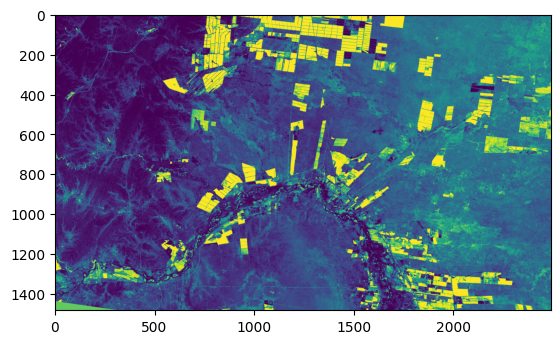

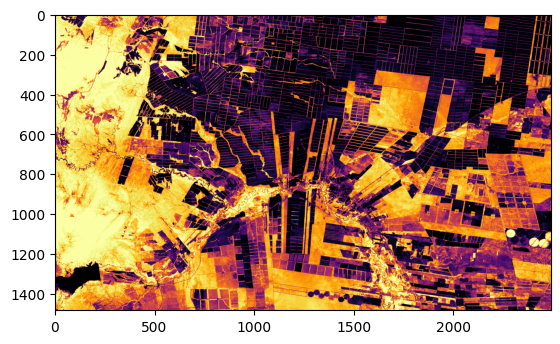

In [ ]:
'''Recortar las im√°genes a la zona comprendida entre las coordenadas
24.867¬∞N, 64.539¬∞W, 25.290¬∞S, 63.829¬∞E
Calcular el NDVI para cada imagen por a√±o y apilarlas
Clasificar el apilado de NDVI utilizando el m√©todo de k-means con 3 clases
espectrales
Reclasificar la escena seg√∫n:
    * zonas con alto NDVI que no cambiaron (color  RGB: 45, 207, 96)
    * zonas con bajo NDVI que no cambiaron (color  RGB: 255, 255, 191)
    * zonas con disminuci√≥n de NDVI (color  RGB: 252, 141, 89)
Imprimir la imagen clasificada obtenida '''

# calculo ndvi para 1986 y 2017 en la zona recortada
# ambos son np array
# Se calcula el NDVI (√çndice de Vegetaci√≥n de Diferencia Normalizada) para cada a√±o.

ndvi_1986 = ndvi(banda_red_1986, banda_nir_1986)
ndvi_2017_A = ndvi(banda_red_2017, banda_nir_2017)

# recorto para que ambos array tengan la misma cantidad de filas/ columnas
ndvi_2017 = ndvi_2017_A[:1483, :2490]


# muestro imagenes

plt.imshow(ndvi_1986, vmin = np.percentile(ndvi_1986.flatten(),5), vmax
            = np.percentile(ndvi_1986.flatten(), 95), cmap = 'viridis')
plt.show()
plt.imshow(ndvi_2017, vmin = np.percentile(ndvi_2017.flatten(),5), vmax
            = np.percentile(ndvi_2017.flatten(), 95), cmap = 'inferno')
plt.show()


In [ ]:
# apilo ambos array
df_ndvi = pd.DataFrame({'ndvi_1986': ndvi_1986.flatten(),
                        'ndvi_2017': ndvi_2017.flatten()})
print(f'Shape de ndvi: ¬¥{df_ndvi.shape}')
print(f'Primeras 20 l√≠neas de ndvi:\n {df_ndvi.head(20)}')

Shape de ndvi: ¬¥(3692670, 2)
Primeras 20 l√≠neas de ndvi:
     ndvi_1986  ndvi_2017
0   -0.426158   0.783563
1   -0.394894   0.800377
2   -0.401429   0.839165
3   -0.416706   0.849752
4   -0.435464   0.845601
5   -0.411703   0.854213
6   -0.398157   0.853548
7   -0.428453   0.839528
8   -0.430296   0.814405
9   -0.416667   0.805813
10  -0.416667   0.822866
11  -0.420587   0.824789
12  -0.415413   0.808157
13  -0.425832   0.824190
14  -0.433518   0.805263
15  -0.406953   0.801015
16  -0.411921   0.803030
17  -0.405934   0.810819
18  -0.390542   0.845856
19  -0.391098   0.863122


In [ ]:
'''
Clasificar el apilado de NDVI utilizando el m√©todo de k-means con 3 clases
espectrales
'''

# invoco un clasificador kmeans c/ 3 clusters, fijo semilla x reproducibilidad
kmeans = KMeans(n_clusters = 3, random_state = 7)
ndvi_clasificado = kmeans.fit_predict(df_ndvi)  # fitea y clasifica


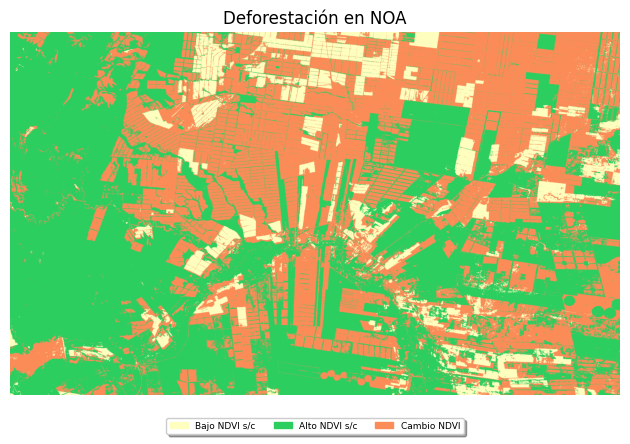

In [ ]:
'''
Reclasificar la escena seg√∫n:
    * zonas con alto NDVI que no cambiaron (color  RGB: 45, 207, 96)
    * zonas con bajo NDVI que no cambiaron (color  RGB: 255, 255, 191)
    * zonas con disminuci√≥n de NDVI (color  RGB: 252, 141, 89)
Imprimir la imagen clasificada obtenida
'''

# paso los colores RGB como tupla normalizada
color_ndvi = colors.ListedColormap([
    (252/256, 141/256, 89/256),   # zonas con disminuci√≥n de NDVI
    (45/256, 207/256, 96/256),    # zonas con alto NDVI sin cambio
    (255/256, 255/256, 191/256)   # zonas con bajo NDVI sin cambio
])


# con los 'limites' apareo los colores con las clases y creo norma de color
limites = [0, 1, 2, 3]
norm_ndvi = colors.BoundaryNorm(limites, color_ndvi.N)
# texto para la figura
text = ['Cambio NDVI', 'Alto NDVI s/c',  'Bajo NDVI s/c']
# apareo texto con color
box = [mpatches.Patch(color = color_ndvi(i), label="{:s}".format(text[i]))
        for i in range(len(text))]
leyenda = box[::-1]

# creo gr√°fico y lo guardo como archivo, adem√°s de mostrarlo
plt.imshow(ndvi_clasificado.reshape(ndvi_1986.shape), cmap = color_ndvi,
            norm = norm_ndvi)
plt.title('Deforestaci√≥n en NOA')
plt.legend(handles = leyenda, fontsize = 6.5, loc='upper center',
            bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)
#plt.colorbar(shrink = 0.5)
plt.axis('off')
plt.tight_layout()
plt.savefig('deforestacion.png', dpi = 1200) # guardo figura en archivo
plt.show()